In [77]:
# Copyright 2020 Alex Khan
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

"""
Things to do:
 - Please name this file <demo_name>.py
 - Fill in [yyyy] and [name of copyright owner] in the copyright (top line)
 - Add demo code below
 - Format code so that it conforms with PEP 8
"""

import numpy as np
from numpy.random import rand

from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
from minorminer import find_embedding
import networkx as nx
import dwave.inspector



def Build_Q(dim):
    Q =  2*rand(dim,dim) - 1
    Q = (Q+Q.T)/2
    for k in range(dim):
        Q[k,k] = np.abs(Q[k,k])
    return(Q)


def Run_Dwave(Q):

    linear={('a'+str(k), 'a'+str(k)):Q[k][k] for k in range(dim)}

    quadratic={('a'+str(i+1), 'a'+str(j)):Q[i+1][j] for i in range(dim-1) for j in range(dim-1) if j<i+1}

    QDwave = dict(linear)
    QDwave.update(quadratic)

    print(QDwave)

    chainstrength = 10
    numruns = 100

    #clique = nx.complete_graph(7).edges()
    #target_graph = nx.random_regular_graph(d=4, n=30).edges()
    #embedding = find_embedding(clique, target_graph)
    #print(embedding)

    sampler = EmbeddingComposite(DWaveSampler())


    response = sampler.sample_qubo(QDwave, chain_strength=chainstrength, num_reads=numruns)
    #print(response)
    #dwave.inspector.show(QDwave,response)
    
    return(response)

Initial conditions at t=0


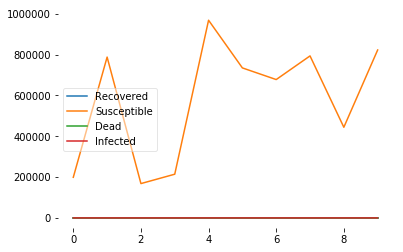

This plot shows a few instances of infected over time


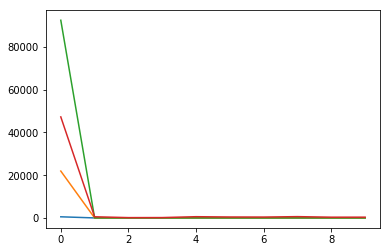

Results at the end of the run per location x


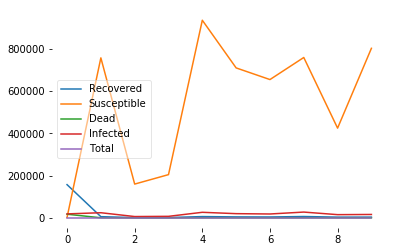

This plot has distance on the horizontal axis
Time: 50.00000000000044
Total Population:  5811750.431595733
Total Susceptible:      5411137.697551735
Total Infected:    182221.92177921877
Total Recovered:   196551.7310383016
Total Deaths:      21839.081226477963
Total population results over time. Sum over all x


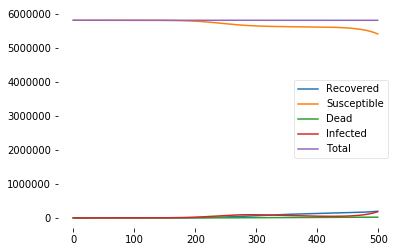

This plot has time on the horizontal axis


In [82]:
# SIR model showing progression of disease through a population 
# to be modeled on an annealing quantum computer

#
#    @2020 Alex Khan. All rights reserved
#    
#    This model is not indented to accurately predict or simulate real results
#    the goal is to create a simplifed version that can then be modeled on
#    an annealing quantum computer through a QUBO

#    This code simulates the movement of the disease over a distance x[0] to x[end]

#    Acknowledgements:
#    The original formula and code was taken from 
#    https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/
#    The SIR model differential equations:
#    def deriv(y, t, N, beta, gamma):
#    S, I, R = y
#    dSdt = -beta * S * I / N
#    dIdt = beta * S * I / N - gamma * I
#    dRdt = gamma * I
#    return dSdt, dIdt, dRdt
#    equations describing this model were first derived by Kermack and McKendrick [Proc. R. Soc. A, 115, 772 (1927)

#    More information on the formula and code is described 
#    by David Smith and Lang Moore
#    and can be found at:
#    https://www.maa.org/book/export/html/115606

#    An interesting simulation and models can be found at:    
#    https://gabgoh.github.io/COVID/index.html
#    https://python.quantecon.org/sir_model.html

## This version uses a) 1/N as a multiplier. 
#                    b) S[x] instead of S[x+/-1] in the transfer_rate terms. 
#                       This is because the change in infection in the transfer depends on the
#                       number infected at [x+/-1], but on those susceptible at x


import numpy as np
import matplotlib.pyplot as plt
import random

#### c is each instance of a city in this version
#### ctot is the total number of cities
ctot=10
c = [0] * (ctot)



#x[0]=1.0
#c=.7


#### Change the time scale
tend=50
dt=0.1
t=0.0

# Plot parameters
nPlots=5
printwhen=tend/dt/nPlots
printnow=0

#
# Build Initial conditions
#

# Number of people per location x
Nper0 = 1000000

# Total population, N.
# If not using random population
# Initialize Population per x

# a) If using the same value for all
#N = [Nper0] * (xend)

# b) If using random population
N = [random.randint(50000, Nper0) for x in range(0,ctot)]

    
# c) If using pattern population
#for kk in range (0,40):
#    N[kk]=20
#for kk in range (41,60):
#    N[kk]=100
#for kk in range (61, 100):
#    N[kk]=100

# Initial population check print
#for ii in range (0,end):
#    print(ii,N[ii])


# Initialize I
I = [0.0] * (ctot)

# Where are the infected at t=0
I[0] = 10

# Initial population check print
#for ii in range (0,end):
#    print(ii,I[ii])

# initialize S
S = [0.0]*(ctot)


# Now build total Susceptible per x
for kk in range (0,ctot):
    S[kk]=N[kk]-I[kk]

# Initial Susceptible check print
#for ii in range (0,end):
#    print(ii,S[ii])

    
#S=N <- this appears to link memory locations
# Everyone else, S0, is susceptible to infection initially.
#S0 = N - I0 - R0

# Where does the infection start
## comment if using random population
#S = [Nper0-Ninf0] * (end)

R = [0.0] * (ctot)
D = [0.0] * (ctot)
T = [0.0] * (ctot)

Rt=[]
St=[]
Dt=[]
It=[]
Tt=[]
Sp=0

  
  #
 ###
##### Make updates to rates here
 ###
  #
    
# Contact rate, beta (in 1/days).
beta = 0.5
# good range for beta 0.3-0.7
# smaller beta will delay spread, larger beta spreads quickly
#mean recovery rate, gamma (in 1/days)
gamma = 0.09
#mean death rate, gamma (in 1/days)
delta=0.01


# Contact rate, beta (in 1/days).
#beta = 0.7
#mean recovery rate, gamma (in 1/days)
#gamma = 0.05
#mean death rate, gamma (in 1/days)
#delta=0.03


# Initialize Transfer rate and assign value
transfer_rate=.0000001
#transfer_rate=0.001 to 0.01
#transfer_rate of 0.00001 or less eg. 0.0000001 shows multiple peaks
#smaller transfer rates show that once transfer occurs, disease spreads fast locally

# a) for a fixed transfer rate on all links
#TransRate = np.ones(shape=(xend,xend))
#TransRate =TransRate*transfer_rate

#TransRate = np.zeros(shape=(xend,xend))
# b) for random transfer rate
TransRate = np.zeros(shape=(ctot,ctot))
for ii in range (0,ctot):
    for jj in range (0,ctot):
        if ii!=jj:
            TransRate[ii][jj]=random.randint(5,10)*transfer_rate/10
#print(TransRate)


#
# Partial Differenetial Equations
#

def fdSdt(S,I,N):
    #if N==0:
    #    return(0)
    #return(-beta * S * I)
    Sus=-beta * S * I/N
    
    return(Sus)
    

def fdSdt_tr(Tr, S,I,N):
    #if N==0:
    #    return(0)
    # Note use S[x] but I[x+/-1]
    #return(-transfer_rate * S * I)
    return(-Tr * S * I/N)

def fdIdt(S,I,N):
    #print('inside fdIdt',N)
    Sus=beta * S * I/N
    #    return(0)
    #return(beta * S * I  - gamma * I- delta * I)
    return(Sus - gamma * I- delta * I)

def fdIdt_tr(Tr, S,I,N):
    #if N==0:
    #    return(0)
    # Note use S[x] but I[x+/-1]
    #return(transfer_rate * S * I )
    
    return(Tr * S * I/N )
    
# number recovered 
def fdRdt(I):
    return(gamma * I)
    
def fdDdt(I):
    return(delta*I)
    
# total count check
def fT(S, I, R, D):
    return(S+I+R+D)


    
# Plot initial values
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(R, label='Recovered')
ax.plot(S, label='Susceptible')
ax.plot(D, label='Dead')
ax.plot(I, label='Infected')
legend=ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
print('Initial conditions at t=0')
plt.show()
# End Plot


Tstart=np.sum(S)+np.sum(I)+np.sum(R)+np.sum(D)

while t<tend:
    #print('======= At time=',t)
    # Run forward through the population
    for xi in range (0,ctot):   
        for xj in range (0,ctot):

                if xi==xj:
                # linear terms    
                    S[xi]=S[xi]+fdSdt(S[xi],I[xi],N[xi])*dt
                    if S[xi]<0:
                        S[xi]=0

                    I[xi]=I[xi]+fdIdt(S[xi],I[xi],N[xi])*dt

                    R[xi]=R[xi]+fdRdt(I[xi])*dt

                    D[xi]=D[xi]+fdDdt(I[xi])*dt
                else:
                # quadratic terms
                    S[xi]=S[xi]+fdSdt_tr(TransRate[xi][xj],S[xi],I[xj],N[xj])*dt
                    if S[xi]<0:
                        S[xi]=0

                    I[xi]=I[xi]+fdIdt_tr(TransRate[xi][xj],S[xi],I[xj],N[xj])*dt

                #print(xi, xj, S[xi], I[xi])
    Tt.append(np.sum(S)+np.sum(I)+np.sum(R)+np.sum(D))
    St.append(np.sum(S))
    It.append(np.sum(I))
    Rt.append(np.sum(R))
    Dt.append(np.sum(D))


    if (printnow==printwhen):

        plt.plot(I)

        printnow=0
    printnow+=1
    t+=dt

print('This plot shows a few instances of infected over time')
plt.show()   
# Plot    
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(R, label='Recovered')
ax.plot(S, label='Susceptible')
ax.plot(D, label='Dead')
ax.plot(I, label='Infected')
ax.plot(T, label='Total')
legend=ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
print('Results at the end of the run per location x')
plt.show()
print('This plot has distance on the horizontal axis')


print('Time:', t)
print('Total Population: ', np.sum(fT(S,I,R,D)))
print('Total Susceptible:     ', np.sum(S))
print('Total Infected:   ', np.sum(I))
print('Total Recovered:  ', np.sum(R))
print('Total Deaths:     ', np.sum(D))


fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(Rt, label='Recovered')
ax.plot(St, label='Susceptible')
ax.plot(Dt, label='Dead')
ax.plot(It, label='Infected')
ax.plot(Tt, label='Total')
legend=ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
print('Total population results over time. Sum over all x')
plt.show()
print('This plot has time on the horizontal axis')
    


# A grid of time points (in days)
#t = np.linspace(0, 160, 160)
# Plot the data on three separate curves for S(t), I(t) and R(t)
#fig = plt.figure(facecolor='w')
#ax = fig.add_subplot(111, axis_bgcolor='#dddddd', axisbelow=True)
#ax = fig.add_subplot(111, axisbelow=True)
#ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
#ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
#ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
#ax.set_xlabel('Time /days')
#ax.set_ylabel('Number (1000s)')
#ax.set_ylim(0,1.2)
#ax.yaxis.set_tick_params(length=0)
#ax.xaxis.set_tick_params(length=0)
#ax.grid(b=True, which='major', c='w', lw=2, ls='-')
#legend = ax.legend()
#legend.get_frame().set_alpha(0.5)
#for spine in ('top', 'right', 'bottom', 'left'):
#    ax.spines[spine].set_visible(False)
#plt.show()

In [83]:
np.max(I)

27642.90387707069

In [84]:
np.argmax(I)

7

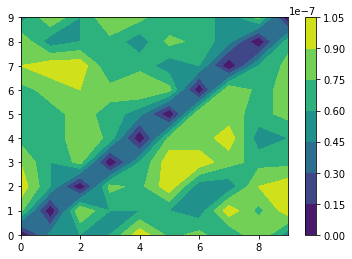

In [105]:
cp = plt.contourf(TransRate)
plt.colorbar(cp)

ax.set_title('Contour Plot')

plt.show()

In [86]:
# Line below can be run as subsequent time intervals

Initial conditions at t=0


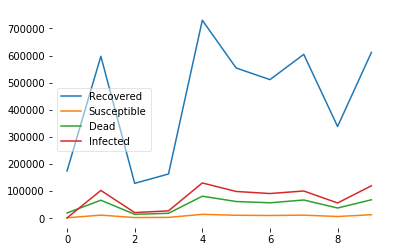

This plot shows a few instances of infected over time


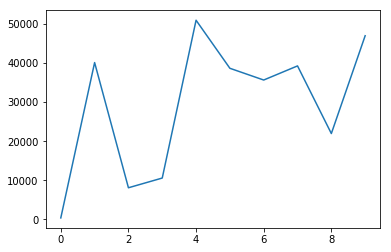

Results at the end of the run per location x


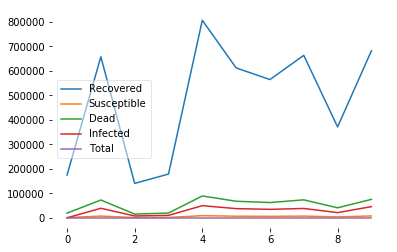

This plot has distance on the horizontal axis
Time: 10.09999999999998
Total Population:  5729929.701679494
Total Susceptible:      54594.91724183288
Total Infected:    287004.13855372334
Total Recovered:   4849497.581295545
Total Deaths:      538833.0645883936
Total population results over time. Sum over all x


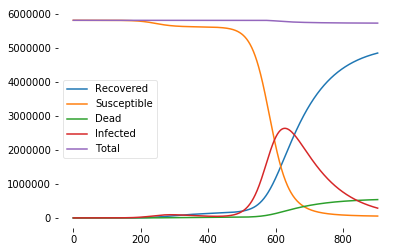

This plot has time on the horizontal axis


In [100]:
t=0
tend=10

# Plot initial values
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(R, label='Recovered')
ax.plot(S, label='Susceptible')
ax.plot(D, label='Dead')
ax.plot(I, label='Infected')
legend=ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
print('Initial conditions at t=0')
plt.show()
# End Plot


Tstart=np.sum(S)+np.sum(I)+np.sum(R)+np.sum(D)

while t<tend:
    #print('======= At time=',t)
    # Run forward through the population
    for xi in range (0,ctot):   
        for xj in range (0,ctot):

                if xi==xj:
                # linear terms    
                    S[xi]=S[xi]+fdSdt(S[xi],I[xi],N[xi])*dt
                    if S[xi]<0:
                        S[xi]=0

                    I[xi]=I[xi]+fdIdt(S[xi],I[xi],N[xi])*dt

                    R[xi]=R[xi]+fdRdt(I[xi])*dt

                    D[xi]=D[xi]+fdDdt(I[xi])*dt
                else:
                # quadratic terms
                    S[xi]=S[xi]+fdSdt_tr(TransRate[xi][xj],S[xi],I[xj],N[xj])*dt
                    if S[xi]<0:
                        S[xi]=0

                    I[xi]=I[xi]+fdIdt_tr(TransRate[xi][xj],S[xi],I[xj],N[xj])*dt

                #print(xi, xj, S[xi], I[xi])
    Tt.append(np.sum(S)+np.sum(I)+np.sum(R)+np.sum(D))
    St.append(np.sum(S))
    It.append(np.sum(I))
    Rt.append(np.sum(R))
    Dt.append(np.sum(D))


    if (printnow==printwhen):

        plt.plot(I)

        printnow=0
    printnow+=1
    t+=dt

print('This plot shows a few instances of infected over time')
plt.show()   
# Plot    
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(R, label='Recovered')
ax.plot(S, label='Susceptible')
ax.plot(D, label='Dead')
ax.plot(I, label='Infected')
ax.plot(T, label='Total')
legend=ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
print('Results at the end of the run per location x')
plt.show()
print('This plot has distance on the horizontal axis')


print('Time:', t)
print('Total Population: ', np.sum(fT(S,I,R,D)))
print('Total Susceptible:     ', np.sum(S))
print('Total Infected:   ', np.sum(I))
print('Total Recovered:  ', np.sum(R))
print('Total Deaths:     ', np.sum(D))


fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(Rt, label='Recovered')
ax.plot(St, label='Susceptible')
ax.plot(Dt, label='Dead')
ax.plot(It, label='Infected')
ax.plot(Tt, label='Total')
legend=ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
print('Total population results over time. Sum over all x')
plt.show()
print('This plot has time on the horizontal axis')
    

In [98]:
np.argmax(I)

4

In [99]:
np.max(I)

129999.68432984581

In [101]:
# Building the Objective function
# 1. Minimize the number infected and dead 
# 2. minimize the financial impact 

# 1. Lets define the objective function in terms 


# a) Linear terms 
#    As long as a city is open it has a constant positive effect of its economic health
#
#    Oe(n1)=Ke [1- (I(n1)+D(n1)) / N(n1) ] * N(n1)
#
#             We will reduce the city's economy by its own internal impact 
#             We multiply by N of the city to relate the economic impact by the size of the city as well
#             lets ignore any inter city effect for now
# a) Quadratic terms
#    As long as the two cities are open it has the negative "risk" of transmitting the disease to a susceptible 
#    population between the two cities
#    
#    Or(n1)= Kr * [Tr(n1n2) * (S(n1)+S(n2)) * (I(n2)+I(n2))](n1)(n2) / ( N(n1)+N(n2))
#
#             assuming this is a quadratic effect based on the connection to another city 
#             Kr is a constant and the negative perceived risk of the number infected in one city on the other city
#             Note: For DWave there is only one coupling between two qubits, it is not directional, so
#                   This must be an effect between the two cities

# If Ke is a large negative number, then the more cities that are open the lower the minimum
Ke=-0.000001
# If Kr is small, the quadratic terms are small and will not cause cities to be shut down
Kr=10
O= np.empty((ctot, ctot))

for i in range (0, ctot):
    # linear term
    
    O[i][i] = Ke * (N[i] - (I[i]+D[i]))
    print(O[i][i], Ke,  N[i] , (I[i]+D[i]))
        
for i in range (0, ctot):
    for j in range (0, ctot):
        # quadratic terms
        if i!=j:
            O[i][j]= Kr * (TransRate[i][j]+TransRate[j][i])*(S[i]+S[j])*(I[i]+I[j]) /(N[i]+N[j])
        
print(O)        
        
            

-0.1792877167534213 -1e-06 199112 19824.283246578674
-0.6758417000911391 -1e-06 788198 112356.29990886096
-0.14466450247099663 -1e-06 168249 23584.497529003354
-0.18397725779868146 -1e-06 214246 30268.742201318535
-0.8292218278744181 -1e-06 968751 139529.17212558186
-0.629265514039021 -1e-06 735149 105883.48596097896
-0.5804042101821559 -1e-06 678066 97661.78981784402
-0.6817796319898212 -1e-06 793949 112169.36801017876
-0.3815385824964387 -1e-06 444311 62772.417503561286
-0.7012038531617895 -1e-06 822991 121787.14683821055
[[-1.79287717e-01  4.64196410e-04  1.09726703e-04  1.35334117e-04
   7.80565918e-04  4.84069978e-04  4.77193444e-04  5.21227995e-04
   3.44143838e-04  4.29593827e-04]
 [ 4.64196410e-04 -6.75841700e-01  6.65702063e-04  5.60491060e-04
   1.01284231e-03  9.48660701e-04  9.12352001e-04  1.45912191e-03
   6.85494553e-04  1.55178028e-03]
 [ 1.09726703e-04  6.65702063e-04 -1.44664502e-01  2.73254167e-04
   8.76259089e-04  7.80055527e-04  5.67607857e-04  6.49931998e-04
   4

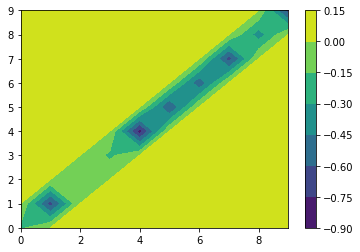

In [102]:
cp = plt.contourf(O)
plt.colorbar(cp)

ax.set_title('Contour Plot')

plt.show()

In [93]:
# STOP next line will execute the matrix O (the object function matrix) on DWave using DWave account time

In [103]:
# Terminal Commands
dim=ctot
result=Run_Dwave(O)

{('a0', 'a0'): -0.1792877167534213, ('a1', 'a1'): -0.6758417000911391, ('a2', 'a2'): -0.14466450247099663, ('a3', 'a3'): -0.18397725779868146, ('a4', 'a4'): -0.8292218278744181, ('a5', 'a5'): -0.629265514039021, ('a6', 'a6'): -0.5804042101821559, ('a7', 'a7'): -0.6817796319898212, ('a8', 'a8'): -0.3815385824964387, ('a9', 'a9'): -0.7012038531617895, ('a1', 'a0'): 0.00046419641048752006, ('a2', 'a0'): 0.00010972670343171357, ('a2', 'a1'): 0.0006657020634565616, ('a3', 'a0'): 0.00013533411680358373, ('a3', 'a1'): 0.0005604910595068788, ('a3', 'a2'): 0.00027325416690242597, ('a4', 'a0'): 0.0007805659179582362, ('a4', 'a1'): 0.0010128423097816243, ('a4', 'a2'): 0.0008762590894247607, ('a4', 'a3'): 0.0007422406628281521, ('a5', 'a0'): 0.0004840699779946278, ('a5', 'a1'): 0.0009486607010205005, ('a5', 'a2'): 0.0007800555273060654, ('a5', 'a3'): 0.0007763138128341026, ('a5', 'a4'): 0.001083854458941757, ('a6', 'a0'): 0.00047719344369081683, ('a6', 'a1'): 0.0009123520006429166, ('a6', 'a2'): 0

In [104]:
print(result)

   a0 a1 a2 a3 a4 a5 a6 a7 a8 a9    energy num_oc. chain_.
0   1  1  1  1  1  1  0  1  1  1 -4.379351       1     0.0
1   1  1  1  1  1  1  1  1  1  0 -4.259617       1     0.0
2   0  0  1  1  1  1  1  1  1  1 -4.107943       1     0.0
3   1  1  1  0  1  1  1  1  1  0 -4.079956       1     0.0
4   1  1  0  1  1  0  1  1  0  1  -3.81306       1     0.0
5   0  1  0  0  1  1  1  0  1  1 -3.781914       1     0.0
6   1  1  0  1  1  1  1  1  0  0 -3.742075       1     0.0
7   0  1  1  1  1  1  1  0  0  1  -3.72522       1     0.0
8   1  1  1  0  1  1  1  0  0  1 -3.721779       1     0.0
9   0  1  0  0  0  1  1  1  1  1 -3.634808       1     0.0
10  0  0  0  1  1  1  1  1  0  1 -3.590401       1     0.0
11  1  0  0  0  1  1  1  1  0  1 -3.586818       2     0.0
12  0  0  1  1  1  1  0  1  1  1 -3.534374       1     0.0
13  0  1  1  0  1  1  1  1  0  0 -3.526287       1     0.0
14  0  0  1  1  1  0  1  1  1  1 -3.485399       1     0.0
15  1  0  1  0  1  0  1  1  1  1 -3.481761       3     0

Initial conditions at t=0


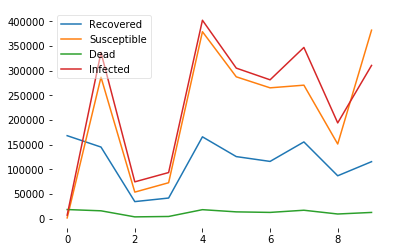

This plot shows a few instances of infected over time


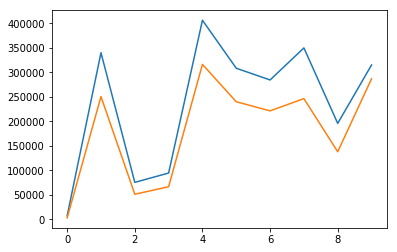

Results at the end of the run per location x


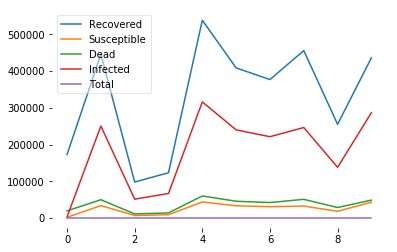

This plot has distance on the horizontal axis
Time: 10.09999999999998
Total Population:  5747472.528058387
Total Susceptible:      250688.70934891145
Total Infected:    1818375.8347546854
Total Recovered:   3310567.185559311
Total Deaths:      367840.798395479
Total population results over time. Sum over all x


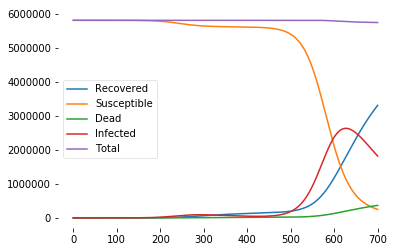

This plot has time on the horizontal axis


In [96]:
t=0
tend=10

# Plot initial values
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(R, label='Recovered')
ax.plot(S, label='Susceptible')
ax.plot(D, label='Dead')
ax.plot(I, label='Infected')
legend=ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
print('Initial conditions at t=0')
plt.show()
# End Plot


Tstart=np.sum(S)+np.sum(I)+np.sum(R)+np.sum(D)

while t<tend:
    #print('======= At time=',t)
    # Run forward through the population
    for xi in range (0,ctot):   
        for xj in range (0,ctot):

                if xi==xj:
                # linear terms    
                    S[xi]=S[xi]+fdSdt(S[xi],I[xi],N[xi])*dt
                    if S[xi]<0:
                        S[xi]=0

                    I[xi]=I[xi]+fdIdt(S[xi],I[xi],N[xi])*dt

                    R[xi]=R[xi]+fdRdt(I[xi])*dt

                    D[xi]=D[xi]+fdDdt(I[xi])*dt
                else:
                # quadratic terms
                    S[xi]=S[xi]+fdSdt_tr(TransRate[xi][xj],S[xi],I[xj],N[xj])*dt
                    if S[xi]<0:
                        S[xi]=0

                    I[xi]=I[xi]+fdIdt_tr(TransRate[xi][xj],S[xi],I[xj],N[xj])*dt

                #print(xi, xj, S[xi], I[xi])
    Tt.append(np.sum(S)+np.sum(I)+np.sum(R)+np.sum(D))
    St.append(np.sum(S))
    It.append(np.sum(I))
    Rt.append(np.sum(R))
    Dt.append(np.sum(D))


    if (printnow==printwhen):

        plt.plot(I)

        printnow=0
    printnow+=1
    t+=dt

print('This plot shows a few instances of infected over time')
plt.show()   
# Plot    
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(R, label='Recovered')
ax.plot(S, label='Susceptible')
ax.plot(D, label='Dead')
ax.plot(I, label='Infected')
ax.plot(T, label='Total')
legend=ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
print('Results at the end of the run per location x')
plt.show()
print('This plot has distance on the horizontal axis')


print('Time:', t)
print('Total Population: ', np.sum(fT(S,I,R,D)))
print('Total Susceptible:     ', np.sum(S))
print('Total Infected:   ', np.sum(I))
print('Total Recovered:  ', np.sum(R))
print('Total Deaths:     ', np.sum(D))


fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(Rt, label='Recovered')
ax.plot(St, label='Susceptible')
ax.plot(Dt, label='Dead')
ax.plot(It, label='Infected')
ax.plot(Tt, label='Total')
legend=ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
print('Total population results over time. Sum over all x')
plt.show()
print('This plot has time on the horizontal axis')
    